# Analyse the Youtube vedio dataset

Given a dataset that contains information about various videos uploaded on YouTube. This dataset is important as it can help users find good quality videos more easily. 

Here are the columns of data: 

Columns: viewCount, likeCount, subscribers, totalViews, totalVideos, durationSecs, titleLength, Label

Label:

1-Good Video

0-Bad Video

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Task#1:

Calculate top 100 channels that have like_count/view_count ratio highest -> let's call it df_LVR_high

Calculate top 100 channels that have like_count/view_count ratio lowest -> let's call it df_LVR_low

1) What is the average title_length of df_high and df_low. 

2) Is there any difference between mean and median of df_high title_length.

3) Reduce the difference between mean and median using a technique taught in classes. Hint: Outliers removal. 

In [9]:
df_data=pd.read_csv('F:\learnwithkhushal.com\youtube_videos_data.csv')
df_data.index = np.arange(1, len(df_data) + 1) 

In [10]:
#Calculating like_count/view_count ratio
df_data['like_count_ratio'] = df_data['likeCount']/df_data['viewCount']

In [11]:
df_data.columns

Index(['viewCount', 'likeCount', 'subscribers', 'totalViews', 'totalVideos',
       'durationSecs', 'title length', 'Label', 'like_count_ratio'],
      dtype='object')

In [18]:
c_l=[]
for i in df_data['like_count_ratio']:
    c_l.append(i)
len(c_l)

1602

In [21]:
#top 100 channels that have like_count/view_count ratio highest -> let's call it df_LVR_high
df_LVR_high=[]
for i in range(100):
    l=max(c_l)
    df_LVR_high.append(l)
    c_l.remove(l)
    
print(len(df_LVR_high))

100


In [25]:
#top 100 channels that have like_count/view_count ratio lowest -> let's call it df_LVR_low
df_LVR_low=[]
for i in range(100):
    l=min(c_l)
    df_LVR_low.append(l)
    c_l.remove(l)
    
print(len(df_LVR_low))

100


In [29]:
#1) What is the average title_length of df_high and df_low.
average_high=df_data["title length"].head(100).mean()
average_low=df_data["title length"].tail(100).mean()
print(average_high)
print(average_low)

51.53
61.9


In [31]:
#2) Is there any difference between mean and median of df_high title_length.
df_high_median = df_data["title length"].head(100).median()

print(average_high)
print(df_high_median)
# calculating difference between mean and median
print( average_high - df_high_median)

51.53
43.5
8.030000000000001


C:\Users\sushma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title length'>

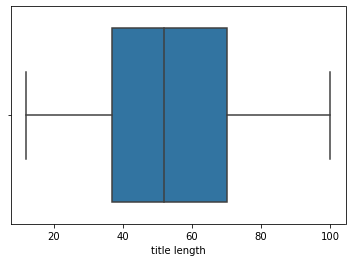

In [32]:
#3) Reduce the difference between mean and median using a technique taught in classes. Hint: Outliers removal.

sns.boxplot(df_data['title length'])
#no outliers for removing

# Task#2: 

Calculate top 100 channels that have totalViews/totalSubscriber ratio highest-> let's call it df_VSR_high

Calculate top 100 channels that have totalViews/totalSubscriber ratio lowest-> let's call it df_VSR_low

 What is the average duration of both df_VSR_high and df_VSR_low
    
 df_VSR_low should have some outliers so please tell with data how these outliers are different than rest of the data. 

In [33]:
df_data.columns

Index(['viewCount', 'likeCount', 'subscribers', 'totalViews', 'totalVideos',
       'durationSecs', 'title length', 'Label', 'like_count_ratio'],
      dtype='object')

In [34]:
#Calculating totalViews/totalSubscriber ratio
df_data['views_subscriber_ratio'] = df_data['totalViews']/df_data['subscribers']

In [35]:
c_l=[]
for i in df_data['views_subscriber_ratio']:
    c_l.append(i)
len(c_l)

1602

In [36]:
#top 100 channels that have totalViews/totalSubscriber ratio highest-> let's call it df_VSR_high
df_VSR_high=[]
for i in range(100):
    l=max(c_l)
    df_VSR_high.append(l)
    c_l.remove(l)
    
print(len(df_VSR_high))

100


In [37]:
#top 100 channels that have totalViews/totalSubscriber ratio lowest-> let's call it df_VSR_low
df_VSR_low=[]
for i in range(100):
    l=min(c_l)
    df_VSR_low.append(l)
    c_l.remove(l)
    
print(len(df_VSR_low))

100


In [39]:
#average duration of df_VSR_high
high=np.array(df_VSR_high)
VSR_high=high.mean()
print(VSR_high)

242.83227779186927


In [40]:
#average duration of df_VSR_low
low=np.array(df_VSR_low)
VSR_low=low.mean()
print(VSR_low)

33.862866139468


C:\Users\sushma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

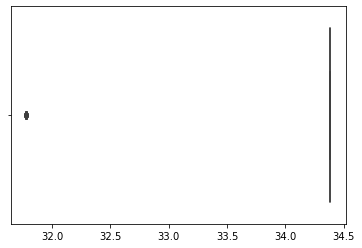

In [42]:
sns.boxplot(df_VSR_low)

<AxesSubplot:ylabel='Count'>

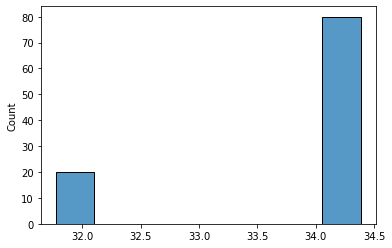

In [43]:
sns.histplot(df_VSR_low)

# Task#3: Visualise a heatmap of the complete data by calcualting correlation using Pandas. 

 1) What are the top 3 features which have more correlation with viewCount. 
 
 2) Does title length affect video quality? Answer with correlation.
 
 3)Does duration affect video quality? Answer with correlation.

In [45]:
#1) What are the top 3 features which have more correlation with viewCount.

df_data.corr()

,viewCount,likeCount,subscribers,totalViews,totalVideos,durationSecs,title length,Label,like_count_ratio,views_subscriber_ratio
viewCount,1.000000,0.984247,0.281188,0.079773,-0.052575,0.260683,0.072836,0.175957,0.006811,-0.102692
likeCount,0.984247,1.000000,0.309161,0.100214,-0.040904,0.305468,0.055666,0.160354,0.051642,-0.109197
subscribers,0.281188,0.309161,1.000000,0.812563,0.483545,0.462973,-0.263303,0.469273,0.094940,0.235919
totalViews,0.079773,0.100214,0.812563,1.000000,0.748335,0.156158,-0.482752,0.499322,0.045313,0.579174
totalVideos,-0.052575,-0.040904,0.483545,0.748335,1.000000,-0.005096,-0.470734,0.513152,-0.053348,0.703266
durationSecs,0.260683,0.305468,0.462973,0.156158,-0.005096,1.000000,0.176075,0.074200,0.100732,-0.149890
title length,0.072836,0.055666,-0.263303,-0.482752,-0.470734,0.176075,1.000000,-0.073785,0.041480,-0.492022
Label,0.175957,0.160354,0.469273,0.499322,0.513152,0.074200,-0.073785,1.000000,0.047741,0.234450
like_count_ratio,0.006811,0.051642,0.094940,0.045313,-0.053348,0.100732,0.041480,0.047741,1.000000,-0.159894
views_subscriber_ratio,-0.102692,-0.109197,0.235919,0.579174,0.703266,-0.149890,-0.492022,0.234450,-0.159894,1.000000


The top 3 correlation with viewcount are -> likeCount, subscribers and durationSecs

In [46]:
#2) Does title length affect video quality?

df_data ['title length'].corr(df_data['Label'])

-0.07378549092602844

Yes, Title length affect video quality, as seen in result the correlationship is negative

In [47]:
#3)Does duration affect video quality?

df_data ['durationSecs'].corr(df_data['Label'])

0.07420012531329272

Yes duration is affect to vedio quality, becouse the correlationship result for hose varibale is becoming zero

<AxesSubplot:>

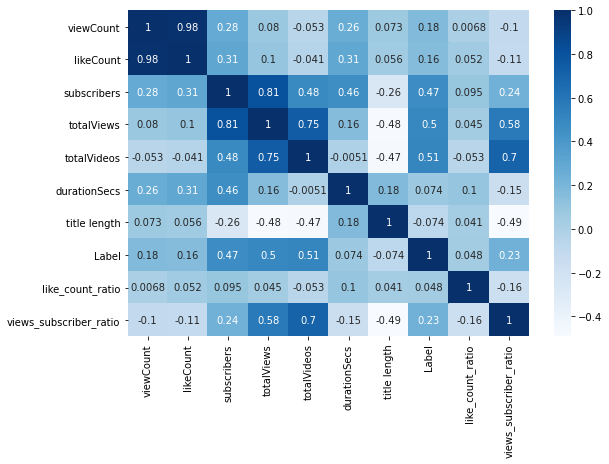

In [50]:
#Visualise a heatmap of the complete data by calcualting correlation using Pandas.
plt.figure(figsize=(9,6))
sns.heatmap(data=df_data.corr(),annot=True, cmap='Blues')